<a href="https://colab.research.google.com/github/Rishabh-Lalla/Prob-Stats_Jio/blob/main/Hypothesis_testing_lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Hypothesis Testing

Hypothesis testing is a fundamental aspect of statistical analysis, which allows researchers to make inferences about a population based on sample data. It is a methodological process used to decide whether to accept or reject a proposed hypothesis about a population parameter.

## Key Concepts in Hypothesis Testing

### Null Hypothesis (H0)
The null hypothesis is a general statement or default position that there is no relationship between two measured phenomena or no association among groups. In hypothesis testing, it predicts that any difference seen in a set of data is due to chance.

### Alternative Hypothesis (H1 or Ha)
The alternative hypothesis challenges the null hypothesis and represents a new theory about the probability distribution of the data. It is a statement that must be true if the null hypothesis is false and typically reflects the assertion the researcher wants to prove.

### Errors in Hypothesis Testing
In the context of hypothesis testing, two types of errors can occur:
- **Type I Error**: This error occurs when the null hypothesis is true, but incorrectly rejected. It is also known as a "false positive".
- **Type II Error**: This error occurs when the null hypothesis is false, but erroneously fails to be rejected. It is known as a "false negative".

## Significance Level (α)
The significance level, often denoted as α, is a threshold at which the probability of making a Type I error is controlled. Commonly, α is set at 0.05 (5%), implying that there is a 5% risk of concluding that a difference exists when there is no actual difference.

## P-value
The p-value is a metric that helps determine the significance of your results in relation to the null hypothesis. A p-value less than the chosen significance level (e.g., 0.05) leads to rejection of the null hypothesis.

Hypothesis testing is not just about performing calculations but also about understanding what the results mean. This process allows researchers to make more informed decisions that extend beyond their immediate data sets.


# Understanding the Z-test

The Z-test is a type of statistical test that is used to determine whether there are differences between the means of two datasets or whether a single sample mean is significantly different from a known value. It is one of the simplest and quickest methods used for hypothesis testing.

## When to Use a Z-test

A Z-test is typically used under the following conditions:
- **Normal Distribution**: The Z-test is most effective when the data is normally distributed. However, due to the Central Limit Theorem, which states that the means of sufficiently large samples of an independent random variable will be approximately normally distributed, the Z-test can be applicable even if the underlying distribution is not normal.
- **Known Variance**: The variance of the population from which samples are drawn must be known. If the population variance is unknown and the sample size is small, a T-test may be more appropriate.
- **Large Sample Size**: The Z-test is generally used when the sample size is greater than 30. For smaller samples, the distribution of the sample mean may not approximate normality as closely, which is required for the accuracy of the Z-test.

## Formula for the Z-test

The formula for calculating the Z-score in a Z-test is given by:

$ Z = \frac{(\bar{x} - \mu)}{(\sigma / \sqrt{n})} $

Where:
- $ \bar{x} $ = sample mean
- $ \mu $ = population mean
- $ \sigma $ = population standard deviation
- $ n $ = sample size

## Relationship Between Z-test and P-value

The Z-test statistic follows a standard normal distribution (Z-distribution), which helps in determining how far a data point is from the population mean in units of standard deviation. Once the Z-score is calculated, the next step is to find the p-value, which is the probability that the observed data occurred by chance under the assumption that the null hypothesis is true.

- **Two-tailed Z-test**: If you are conducting a two-tailed Z-test, you will look at both the extreme lower and upper ends of the Z-distribution to find the probability that the Z-score would fall beyond either end.
- **One-tailed Z-test**: In a one-tailed Z-test, you only look at one end of the distribution to calculate the probability, depending on whether you are testing if the sample mean is significantly greater than or less than the population mean.

The p-value obtained reflects the likelihood of observing a test statistic as extreme as the Z-score calculated from the data, under the null hypothesis. Here's how to interpret the relationship between the p-value and the decision-making process in hypothesis testing:

### Interpreting the P-value
- **Low P-value (Typically < 0.05)**: A low p-value indicates that the observed data is highly unlikely under the null hypothesis. This result suggests rejecting the null hypothesis, meaning there is statistically significant evidence to support the alternative hypothesis.
- **High P-value (≥ 0.05)**: A high p-value suggests that the observed data is consistent with the null hypothesis. Therefore, there is not enough evidence to reject the null hypothesis, and it is retained.

### Z-test Example and P-value Calculation
Consider a scenario where a school claims the average test score of its students is 100. Suppose you collect scores from 30 students and find the sample mean to be 105 with a known population standard deviation of 15. To determine whether this result is statistically significant, you would calculate the Z-score and then the corresponding p-value.



In [ ]:
from scipy.stats import norm

# Known parameters
population_mean = 100
population_std = 15

# Sample data
sample_mean = 105
sample_size = 30
sample_std_error = population_std / (sample_size ** 0.5)

# Calculate the Z-score
z_score = (sample_mean - population_mean) / sample_std_error

# Determine the p-value for a two-tailed test
p_value = 2 * norm.sf(abs(z_score))  # sf is the survival function, equivalent to 1-cdf

print(f"Z-score: {z_score:.2f}")
print(f"P-value: {p_value:.4f}")


Z-score: 1.83
P-value: 0.0679


# Understanding `norm.sf` in Python

The function `norm.sf` comes from the `scipy.stats` module in Python, which is part of the SciPy library used for scientific and technical computing. The `norm.sf` refers to the "survival function," which is the complement of the cumulative distribution function (CDF) for a given distribution. This function is especially useful in statistics for calculating probabilities in the tails of the normal distribution.

## What is the Survival Function?

The survival function, often denoted as \( S(x) \), is defined as:

\[ S(x) = 1 - F(x) \]

where \( F(x) \) is the cumulative distribution function (CDF). The CDF gives the probability that a random variable \( X \) is less than or equal to a certain value \( x \). Therefore, the survival function \( S(x) \) provides the probability that the random variable \( X \) is greater than \( x \).

## Using `norm.sf` in the Context of the Z-test

In the realm of hypothesis testing, particularly when using the normal distribution (as in Z-tests), the survival function is pivotal for determining the probability that the standardized test statistic (the z-score) falls within the tail(s) of the normal distribution. This probability, computed using `norm.sf`, is essential for calculating the p-value, a key factor in deciding whether to reject the null hypothesis.

### Calculation of the Two-Tailed P-value:

For a two-tailed test, the p-value is computed by doubling the output of the survival function for the absolute value of the z-score:

$[ \text{p-value} = 2 \times \text{norm.sf}(|z|) ]$

This operation is necessary because:
- The `norm.sf` function calculates the probability of observing a value greater than \( |z| \) in one tail of the distribution.
- Multiplying this value by 2 accounts for the possibility of extreme values in both tails of the distribution, covering the scenarios where the sample mean might be significantly greater or less than the population mean.

### Example Usage in Python

Here is how you might use `norm.sf` to calculate a two-tailed p-value from a z-score in a Python script:



In [ ]:

from scipy.stats import norm

z_score = 2.5  # Example z-score
p_value = 2 * norm.sf(abs(z_score))  # Calculate two-tailed p-value

print(f"P-value: {p_value:.4f}")


P-value: 0.0124


# Z-Test Examples with Visualization

In this section, we explore practical applications of the Z-test, both one-tailed and two-tailed, with visual demonstrations. We'll use synthetic data to illustrate how you can decide to reject or accept the null hypothesis based on the Z-score and the corresponding p-value.

## Two-Tailed Z-Test Example

### Scenario
Assume we want to test whether the average score of a sample of students is significantly different from the known population mean score of 100, where the population standard deviation is 15.



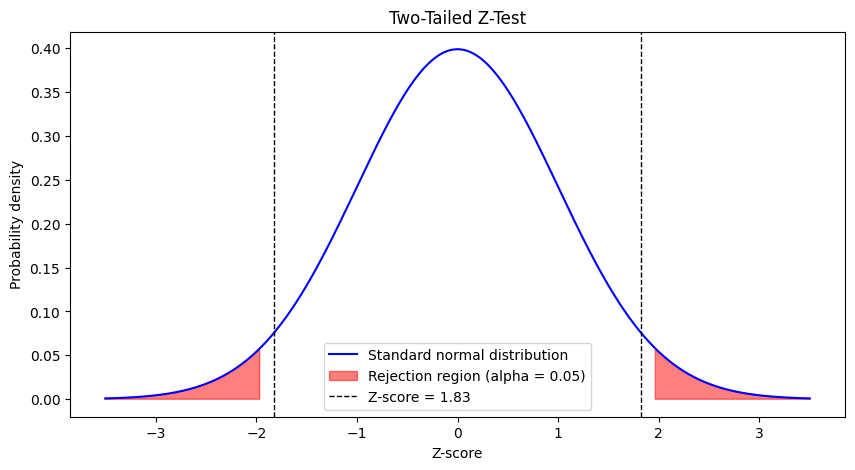

Z-score: 1.83
P-value: 0.0679
Fail to reject the null hypothesis: no significant difference from the population mean.


In [ ]:

import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Known parameters
population_mean = 100
population_std = 15

# Sample data
sample_mean = 105
sample_size = 30
sample_std_error = population_std / np.sqrt(sample_size)

# Calculate the Z-score
z_score = (sample_mean - population_mean) / sample_std_error

# Determine the p-value for a two-tailed test
p_value = 2 * norm.sf(abs(z_score))

# Plotting the standard normal distribution and the Z-score
x = np.linspace(-3.5, 3.5, 1000)
y = norm.pdf(x)

plt.figure(figsize=(10, 5))
plt.plot(x, y, 'b-', label='Standard normal distribution')

# Highlight the rejection regions for alpha = 0.05
plt.fill_between(x, y, where=(x <= -1.96) | (x >= 1.96), color='red', alpha=0.5, label='Rejection region (alpha = 0.05)')
plt.axvline(z_score, color='k', linestyle='dashed', linewidth=1, label=f'Z-score = {z_score:.2f}')
plt.axvline(-z_score, color='k', linestyle='dashed', linewidth=1)

plt.legend()
plt.title('Two-Tailed Z-Test')
plt.xlabel('Z-score')
plt.ylabel('Probability density')
plt.show()

print(f"Z-score: {z_score:.2f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: significant difference from the population mean.")
else:
    print("Fail to reject the null hypothesis: no significant difference from the population mean.")


Now, suppose we want to determine if the sample mean is significantly greater than the population mean under the same conditions.

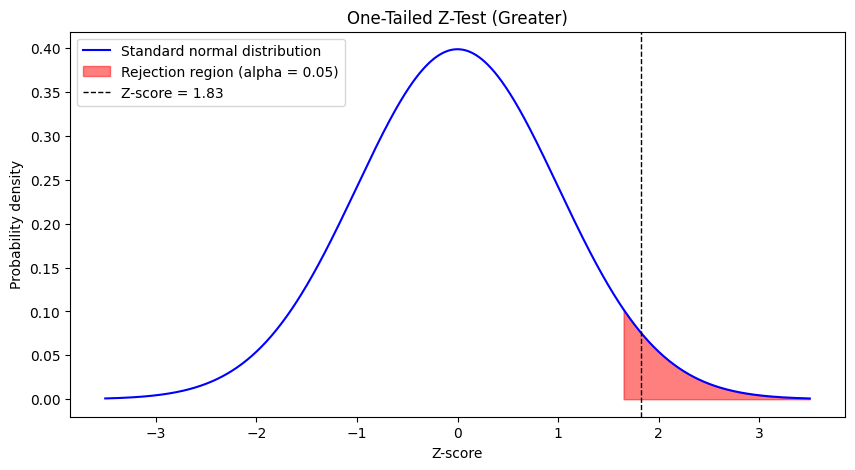

Z-score: 1.83
One-tailed P-value (greater): 0.0339
Reject the null hypothesis: the sample mean is significantly greater than the population mean.


In [ ]:
# Calculate the p-value for a one-tailed test (greater)
p_value_one_tailed = norm.sf(z_score)

# Plotting the standard normal distribution and the Z-score for one-tailed
plt.figure(figsize=(10, 5))
plt.plot(x, y, 'b-', label='Standard normal distribution')

# Highlight the rejection region for alpha = 0.05
plt.fill_between(x, y, where=x >= 1.645, color='red', alpha=0.5, label='Rejection region (alpha = 0.05)')
plt.axvline(z_score, color='k', linestyle='dashed', linewidth=1, label=f'Z-score = {z_score:.2f}')

plt.legend()
plt.title('One-Tailed Z-Test (Greater)')
plt.xlabel('Z-score')
plt.ylabel('Probability density')
plt.show()

print(f"Z-score: {z_score:.2f}")
print(f"One-tailed P-value (greater): {p_value_one_tailed:.4f}")

# Interpretation
if p_value_one_tailed < 0.05:
    print("Reject the null hypothesis: the sample mean is significantly greater than the population mean.")
else:
    print("Fail to reject the null hypothesis: the sample mean is not significantly greater than the population mean.")


# Understanding the T-Test

The T-test is a statistical hypothesis test that is used to compare the means of two groups or to test if the mean of a single sample is significantly different from a known value. Unlike the Z-test, which is used when the population variance is known, the T-test is used primarily when the population variance is unknown and the sample size is small.

## When to Use a T-test

- **Unknown Population Variance**: When the population variance is not known, which is common in real-world data, the T-test provides a reliable method for hypothesis testing about means.
- **Small Sample Size**: The T-test is robust for small sample sizes (typically less than 30) and does not require the stringent condition of normal distribution that the Z-test does due to the Central Limit Theorem.
- **Estimating Standard Error**: The T-test uses the sample standard deviation to estimate the standard error of the sample mean, which accounts for additional uncertainty that arises from estimating population parameters.

## Types of T-Tests

- **One-Sample T-test**: Tests whether the mean of a single group is different from a specified population mean.
- **Two-Sample T-test**: Can be either independent or paired. It tests whether the means of two groups are statistically different from each other.

## Comparison of Z-Test and T-Test Distributions

The main difference between the Z-test and T-test lies in the shape of the distribution used for calculating critical values and p-values. The Z-test uses the standard normal distribution, while the T-test uses the t-distribution, which is more spread out and has thicker tails. This difference becomes less significant as the sample size increases.



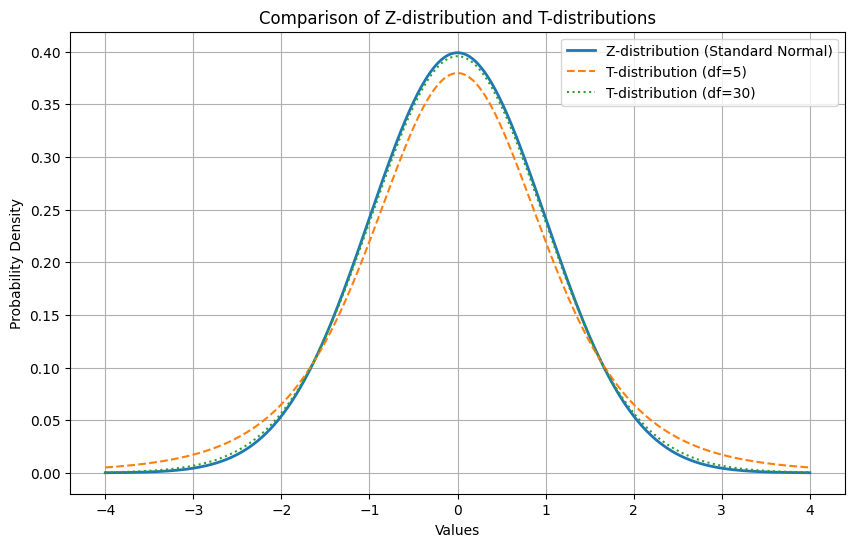

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, t

# Generate points on the x-axis
x = np.linspace(-4, 4, 1000)

# Z-distribution (standard normal distribution)
z_dist = norm.pdf(x)

# T-distribution with different degrees of freedom
t_dist_5 = t.pdf(x, df=5)
t_dist_30 = t.pdf(x, df=30)

# Plotting the distributions
plt.figure(figsize=(10, 6))
plt.plot(x, z_dist, label='Z-distribution (Standard Normal)', linewidth=2)
plt.plot(x, t_dist_5, label='T-distribution (df=5)', linestyle='dashed')
plt.plot(x, t_dist_30, label='T-distribution (df=30)', linestyle='dotted')
plt.title('Comparison of Z-distribution and T-distributions')
plt.xlabel('Values')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()


# T-Test Examples: One-Sample and Two-Sample

T-tests are powerful tools in statistics to determine if there are significant differences between the means of two groups or between the mean of a single group and a known value. Below are practical examples of both one-sample and two-sample T-tests.

## One-Sample T-Test Example

### Scenario
Imagine you are testing whether the average height of a class of students is significantly different from the national average height of 168 cm.



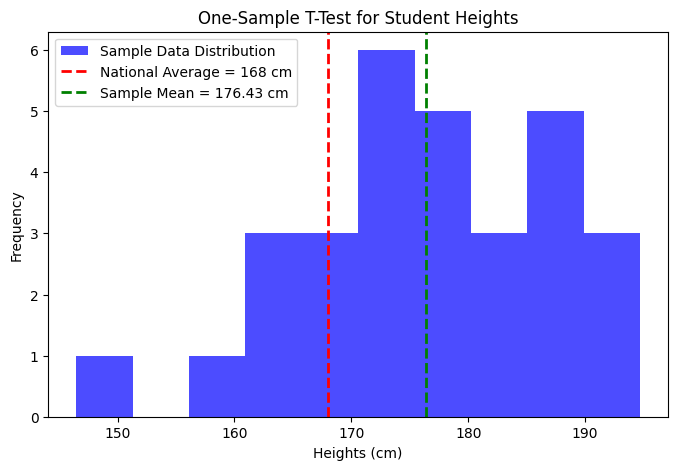

T-Statistic: 4.20
P-Value: 0.0002
Reject the null hypothesis: significant difference from the national average.


In [ ]:
import numpy as np
from scipy.stats import ttest_1samp
import matplotlib.pyplot as plt

# Generate synthetic sample data
np.random.seed(0)
sample_heights = np.random.normal(172, 10, size=30)  # Mean=172, SD=10, N=30

# Perform a one-sample t-test
t_stat, p_value = ttest_1samp(sample_heights, 168)

# Visualization
plt.figure(figsize=(8, 5))
plt.hist(sample_heights, bins=10, color='blue', alpha=0.7, label='Sample Data Distribution')
plt.axvline(x=168, color='red', linestyle='dashed', linewidth=2, label='National Average = 168 cm')
plt.axvline(x=np.mean(sample_heights), color='green', linestyle='dashed', linewidth=2, label=f'Sample Mean = {np.mean(sample_heights):.2f} cm')
plt.title('One-Sample T-Test for Student Heights')
plt.xlabel('Heights (cm)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

print(f"T-Statistic: {t_stat:.2f}")
print(f"P-Value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: significant difference from the national average.")
else:
    print("Fail to reject the null hypothesis: no significant difference from the national average.")


Suppose you want to compare the average heights of students in two different classes to see if there is a significant difference.

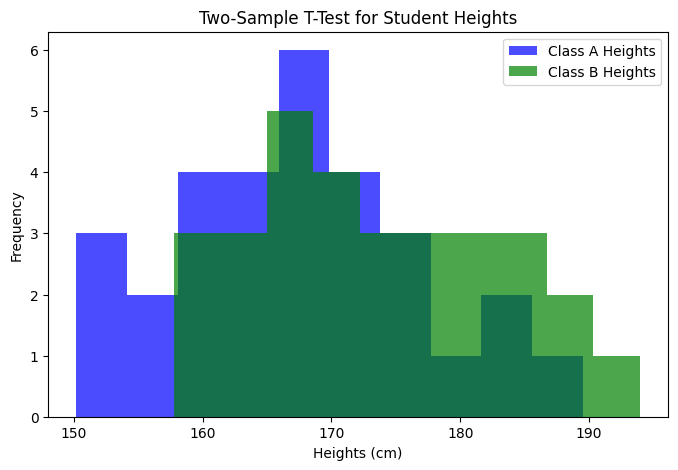

T-Statistic: -2.70
P-Value: 0.0090
Reject the null hypothesis: significant difference between the two classes.


In [ ]:
from scipy.stats import ttest_ind

# Generate synthetic data for two classes
class_a_heights = np.random.normal(170, 10, size=30)
class_b_heights = np.random.normal(175, 10, size=30)

# Perform a two-sample t-test
t_stat, p_value = ttest_ind(class_a_heights, class_b_heights)

# Visualization
plt.figure(figsize=(8, 5))
plt.hist(class_a_heights, bins=10, color='blue', alpha=0.7, label='Class A Heights')
plt.hist(class_b_heights, bins=10, color='green', alpha=0.7, label='Class B Heights')
plt.title('Two-Sample T-Test for Student Heights')
plt.xlabel('Heights (cm)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

print(f"T-Statistic: {t_stat:.2f}")
print(f"P-Value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: significant difference between the two classes.")
else:
    print("Fail to reject the null hypothesis: no significant difference between the two classes.")
